## Measuring the Variance to Mean Ratio##

In neurons there tends to be a strong linear dependence of the variance on the mean. We would like to measure both the strength of this relationship and the parameters of this relationship as best we can. There are a variety of choices both in analysis and experiment that can be adjusted to optimize the accuracy of this measurement as indexed by the bias and variance. To determine these trade offs requires a model.


### Analysis###

$\hat{\mu} = $ estimator of mean

$\hat{\sigma}^2= $ estimator of variance 

$\hat{\beta} = $ estimator of the relationship between variance and mean.

### Experiment###
$n = $ number of stimuli

$m = $ number of trials

$d = $ dynamic range of neuron.


Notes:
I am trying to estimate the relationships of the variance to the mean assuming $\sigma^2= B_0\mu^{B_1}$. This is essentially finding the whitening coeffienctor transformation.



### Model###
We can work this out for models of increasing complexity starting with a simple normal model.

$$Y_i \sim N(\mu_i, \beta \mu_i)$$ with $\beta$ and $\mu_i$ unknown and we want to estimate $\beta$

We can take estimators of the mean and the variance:
$$\hat{\mu_i} = \frac{1}{m}\sum_j^m{Y_{ij}}$$
$$\hat{\sigma^2} = \frac{1}{m-1}\sum_j^m{(Y_{ij}-\hat{\mu_i})^2}$$

The distribution of these estimators in this case are:
$$\hat{\mu_i} \sim N(\mu_i, \frac{\beta \mu_i}{m})$$

$$\hat{\sigma_i^2} \sim \beta \mu_i \chi_{m-1}^2 $$

These are independent conditional on their parameters.



One way to estimate $\beta$ is via linear regression.

Our model is:

$\sigma_i^2 = \beta \mu_i + \epsilon (\beta\mu_i)$


We estimate $\beta$ by solving the equation:

$\hat{\sigma_i^2} = \beta \hat{\mu_i}$

with least squares:

$$\hat{\beta} = \frac{\sum_i^n{[\hat{\sigma_i^2} \hat{\mu_i}]}}{\sum_i^n{[\hat{\mu_i} ]^2}}$$

now to find the approximate distribution of $\hat{\beta}$ we will use the $\delta$ method to do this we need:

$E([\hat{\sigma_i^2} \hat{\mu_i}]) = \beta$

$E([\hat{\mu_i} ]^2)$

$Var([\hat{\sigma_i^2} \hat{\mu_i}])$

$Var([\hat{\mu_i} ]^2)$

and

$Cov([\hat{\sigma_i^2} \hat{\mu_i}], [\hat{\mu_i} ]^2)$


A major problem here is that these are not IID our means and variances are changing. 
And also 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [56]:
lambdas.shape

(200,)

(1000, 20)


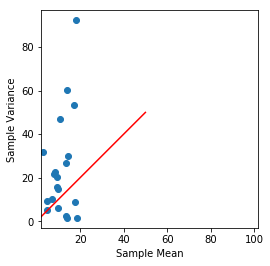

In [163]:
amplitude = 5
base_line = 10
true_r2 = 0.8
n_exps = 1000
vmr = 2
n = 5
m = 20
angle = np.arccos(true_r2**0.5)
#create the expected responses
lambdas = base_line + (np.cos(np.linspace(0, 2*np.pi, m))*amplitude) #s
y = np.random.poisson(lambdas, size=(n_exps, n, m)) # n_experiments n_trials m_stimuli
y = np.random.normal(lambdas, np.sqrt(vmr*lambdas), size=(n_exps, n, m)) # n_experiments n_trials m_stimuli

y_mean = y.mean(1) # average the trials
y_var = y.var(1, ddof=1)
plt.scatter(y_mean[0], y_var[0])
ax = plt.gca()
#ax.set_xscale("log", nonposx='clip')
#ax.set_yscale("log", nonposy='clip')
plt.axis('square')
#plt.xlim([0.1,base_line*amplitude]);plt.ylim([0.1,base_line*amplitude])
plt.plot([0.1,base_line*amplitude],[0.1,base_line*amplitude], color='r')
plt.xlabel('Sample Mean');plt.ylabel('Sample Variance')
print(y_mean.shape)

In [164]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd
slopes = []
for i in range(n_exps):
    df = pd.DataFrame(np.array([np.log(y_mean[i]), np.log(y_var[i])]).T, columns=['mean', 'var'])
    df = pd.DataFrame(np.array([y_mean[i], y_var[i]]).T, columns=['mean', 'var'])
    mod = (ols('var ~ mean - 1', data=df).fit())
    slopes.append(mod.params[0])

/home/dean/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in log


0.15452113852491248

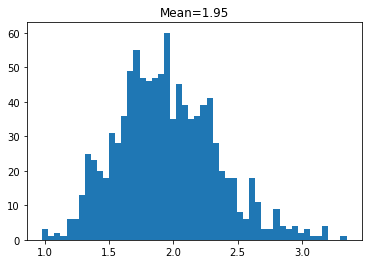

In [165]:
slopes = np.array(slopes)[~np.isinf(slopes)]
plt.hist(slopes, bins=50);
plt.title('Mean=' + str(np.round(np.mean(slopes),2)))

np.sum((slopes - vmr)**2)/1000

In [166]:
print(mod.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.766   
Dependent Variable: var              AIC:                159.6864
Date:               2018-07-04 18:01 BIC:                160.6821
No. Observations:   20               Log-Likelihood:     -78.843 
Df Model:           1                F-statistic:        66.40   
Df Residuals:       19               Prob (F-statistic): 1.27e-07
R-squared:          0.778            Scale:              163.65  
--------------------------------------------------------------------
          Coef.     Std.Err.      t       P>|t|     [0.025    0.975]
--------------------------------------------------------------------
mean      2.2063      0.2708    8.1486    0.0000    1.6396    2.7730
-----------------------------------------------------------------
Omnibus:              1.049        Durbin-Watson:           2.073
Prob(Omnibus):        0.592        Jarque-Bera (JB):        0.720
Skew:          

In [167]:
est = (y_var/y_mean).mean(1)
np.sum((est - vmr)**2)/1000

0.14789070001109644

[ 50  68  87 106 125 144 163 182 201 220 239 258 277 296 315 334 353 372
 391 410 429 448 467 486 505 524 543 562 581 600 619 638 657 676 695 714
 733 752 771 790 809 828 847 866 885 904 923 942 961 980]
[[ 1.          0.63978731]
 [ 0.63978731  1.        ]]


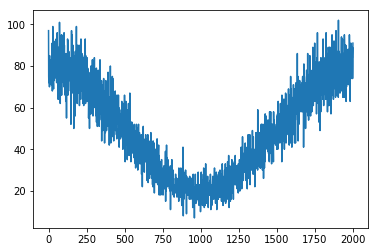

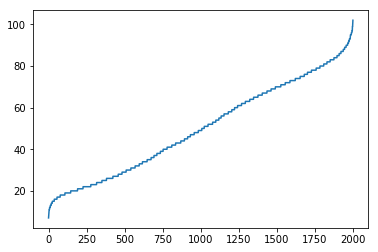

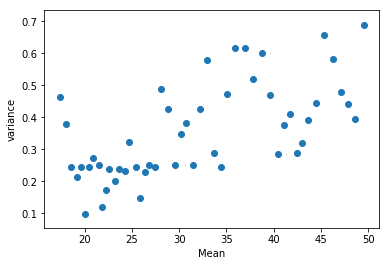

In [123]:
amplitude = 30
base_line = 50
true_r2 = 0.8
n_exps = 1
n = 1
m = 2000
angle = np.arccos(true_r2**0.5)
#create the expected responses
lambdas = base_line + (np.cos(np.linspace(0, 2*np.pi, m))*amplitude) #s
y = np.random.poisson(lambdas, size=(n_exps, n, m)) # n_experiments n_trials m_stimuli
plt.plot(y[0].T)

bin_len=50
bins = np.linspace(50,980,bin_len).astype(int)
print(bins)
ys = np.sort(y[0].ravel())
plt.figure()
plt.plot(ys)
v = [np.var(ys[a_bin:a_bin+bin_len]) for a_bin in bins]
m = [np.mean(ys[a_bin:a_bin+bin_len]) for a_bin in bins]

plt.figure()
plt.scatter(m,v)
plt.xlabel('Mean')
plt.ylabel('variance')
print(np.corrcoef(m,v))
    

Here I want to figure out:
Why should I use the log log transform to the mean and variance: sqaured and linear become orthogonal?
How do my confidence intervals depend upon n, m, dynamic range, and mean. Which should I work the hardest to get?
Why are my residuals not normal?



In [56]:
ys.shape

(2000,)


Taking logs:
$log(\sigma_i^2) = log(\beta) + log(\mu_i)$

Here $\beta = \frac{1}{n} \sum_i^n{\log(\sigma_i^2)} - \frac{1}{n} \sum_i^n{\log(\mu_i)}$

Our estimator of $\beta$ will be:

$\hat{\beta} = \frac{1}{n} \sum_i^n{\log(\hat{\sigma_i^2})} - \frac{1}{n} \sum_i^n{\log(\hat{\mu_i})}$